In [1]:
# data analysis
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
%matplotlib inline

In [16]:
# load dataset
population = pd.read_csv('WorldPopulation.csv')
population.head()

,Year,Country,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop %,World Population,Country Global Rank
0,2020,China,1439323776,0.39,5540090,-348399.0,38.4,1.69,153,60.8,875075919.0,18.47,7794798739,1
1,2019,China,1433783686,0.43,6135900,-348399.0,37.0,1.65,153,59.7,856409297.0,18.59,7713468100,1
2,2018,China,1427647786,0.47,6625995,-348399.0,37.0,1.65,152,58.6,837022095.0,18.71,7631091040,1
3,2017,China,1421021791,0.49,6972440,-348399.0,37.0,1.65,151,57.5,816957613.0,18.83,7547858925,1
4,2016,China,1414049351,0.51,7201481,-348399.0,37.0,1.65,151,56.3,796289491.0,18.94,7464022049,1


In [17]:
population.shape

(4195, 14)

In [18]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            4195 non-null   int64  
 1   Country                         4195 non-null   object 
 2   Population                      4195 non-null   int64  
 3   Yearly % Change                 4195 non-null   float64
 4   Yearly Change                   4195 non-null   int64  
 5   Migrants (net)                  3600 non-null   float64
 6   Median Age                      3600 non-null   float64
 7   Fertility Rate                  3600 non-null   float64
 8   Density (P/Km²)                 4195 non-null   object 
 9   Urban Pop %                     4082 non-null   float64
 10  Urban Population                4082 non-null   float64
 11  Country's Share of World Pop %  4195 non-null   float64
 12  World Population                41

In [26]:
# remove extra symbol
population['Density (P/Km²)'] = population['Density (P/Km²)'].replace(',','')

In [22]:
population['Country'] = population['Country'].astype(str)

In [20]:
population.describe()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Urban Pop %,Urban Population,Country's Share of World Pop %,World Population,Country Global Rank
count,4195.000000,4.195000e+03,4195.000000,4.195000e+03,3.600000e+03,3600.000000,3600.000000,4082.000000,4.082000e+03,4195.000000,4.195000e+03,4195.000000
mean,1993.951132,2.443381e+07,1.668927,3.298374e+05,7.430833e+00,25.490278,3.885772,51.067369,1.203792e+07,0.428942,5.676982e+09,117.167342
std,21.685009,1.067417e+08,1.653519,1.334366e+06,1.063210e+05,8.233313,1.987803,25.996685,4.744380e+07,1.807324,1.732658e+09,67.503854
min,1955.000000,6.440000e+02,-12.930000,-6.730240e+05,-1.077397e+06,14.400000,0.850000,0.000000,0.000000e+00,0.000000,2.773020e+09,1.000000
25%,1975.000000,2.800885e+05,0.620000,1.293000e+03,-1.254925e+04,18.500000,2.080000,30.400000,1.381082e+05,0.010000,4.079481e+09,59.000000
50%,1995.000000,3.687898e+06,1.540000,3.895000e+04,-8.755000e+02,22.750000,3.400000,50.900000,1.579878e+06,0.070000,5.744213e+09,117.000000
75%,2016.000000,1.306608e+07,2.600000,2.076195e+05,5.000250e+03,31.600000,5.740000,72.700000,6.841242e+06,0.250000,7.464022e+09,175.000000
max,2020.000000,1.439324e+09,23.300000,2.067648e+07,1.771991e+06,48.400000,8.800000,100.000000,8.750759e+08,22.700000,7.794799e+09,235.000000


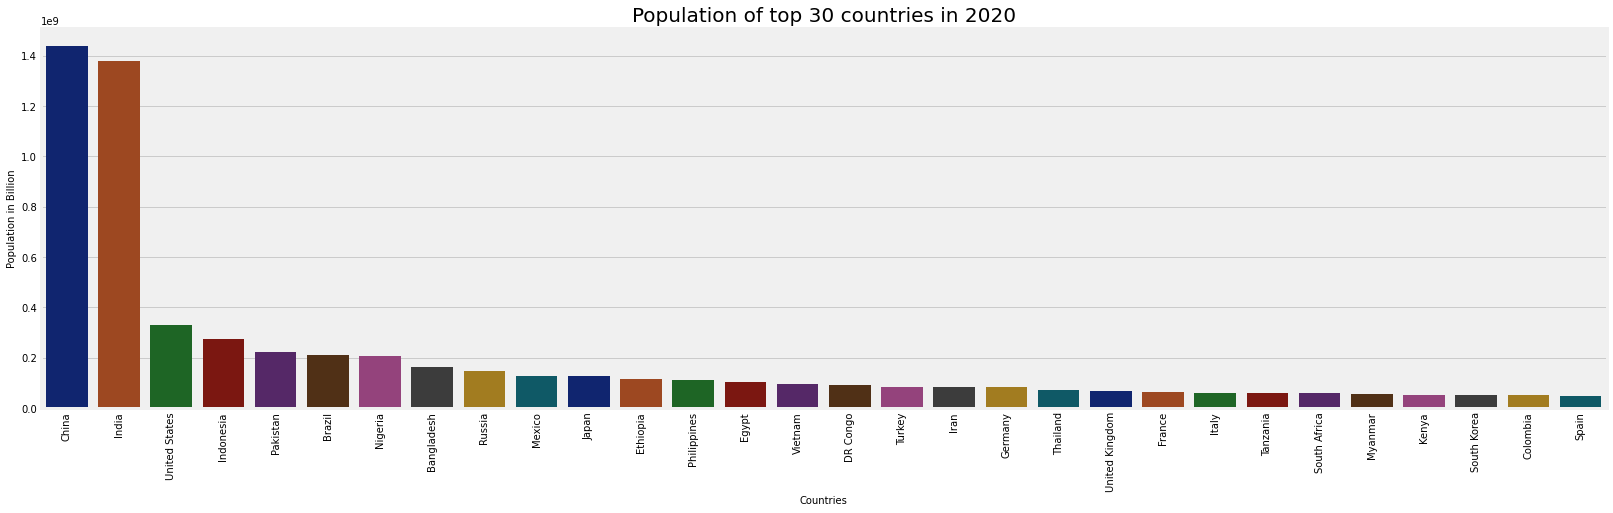

In [27]:
# 2020 population data
current_population = population[population['Year'] == 2020][:30]

plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = current_population['Country'][:30], y = current_population['Population'][:30], palette = 'dark')
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_ylabel(ylabel = 'Population in Billion', fontsize = 10)
ax.set_title(label = 'Population of top 30 countries in 2020', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

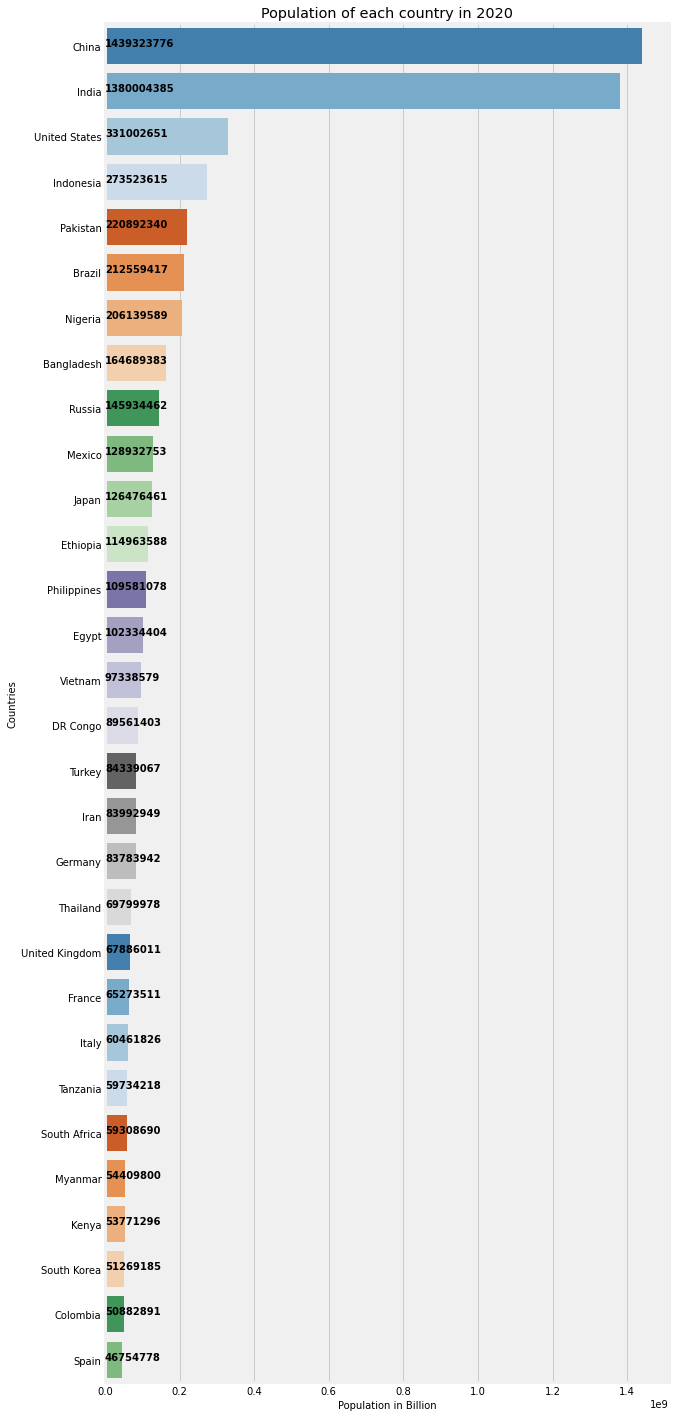

In [28]:
#Top 30 countries by population in 2020.
plt.figure(figsize=(9,25))
ax = sns.barplot(x="Population", y="Country",
                 data=current_population, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(current_population["Population"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)
plt.title("Population of each country in 2020")
ax.set_xlabel(xlabel = 'Population in Billion', fontsize = 10)
ax.set_ylabel(ylabel = 'Countries', fontsize = 10)
plt.show()

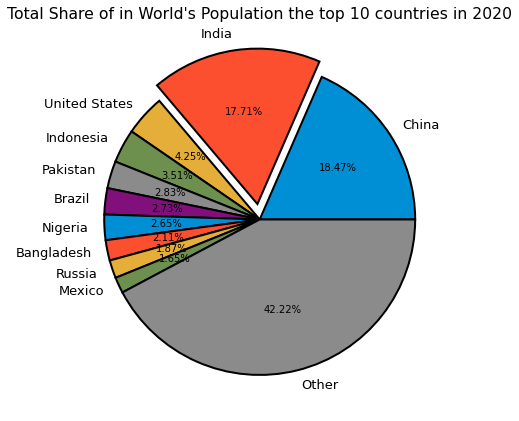

In [29]:
#Total Share in World’s population by top 10 countries in 2020.
unique_countries = population['Country'].unique()
plt.style.use("seaborn-talk")


# set year
year = 2020
df_last_year = population[population['Year'] == year]
series_last_year = df_last_year.groupby('Country')['Population'].sum().sort_values(ascending=False)

labels = []
values = []
country_count = 10
other_total = 0
for country in series_last_year.index:
    if country_count > 0:
        labels.append(country)
        values.append(series_last_year[country])
        country_count -= 1
    else:
        other_total += series_last_year[country]
labels.append("Other")
values.append(other_total)

wedge_dict = {
    'edgecolor': 'black',
    'linewidth': 2        
}

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.title(f"Total Share of in World's Population the top 10 countries in {year}")
plt.pie(values, labels=labels, explode=explode, autopct='%1.2f%%', wedgeprops=wedge_dict)
plt.show()

In [30]:
#Top 5 most populated countries in World.
population_top5_2020 = population[population['Year'] == 2020][:5]
top_5_countries = population_top5_2020['Country'].unique()
top5_popultion = population[population['Country'].isin(top_5_countries)][['Year', 'Country', 'Population']]
top5_popultion_pivot = top5_popultion.pivot(index='Year', columns='Country', values='Population')
top5_popultion_pivot.style.background_gradient(cmap='PuBu')
# Please note, in medium I am unable show the gradient color. 

Country,China,India,Indonesia,Pakistan,United States
Year,,,,,
1955,612241554,409880595,77273425,40488030,171685336
1960,660408056,450547679,87751068,44988690,186720571
1965,724218968,499123324,100267062,50917975,199733676
1970,827601394,555189792,114793178,58142060,209513341
1975,926240885,623102897,130680727,66816877,219081251
1980,1000089235,698952844,147447836,78054343,229476354
1985,1075589361,784360008,164982451,92191510,240499825
1990,1176883674,873277798,181413402,107647921,252120309
1995,1240920535,963922588,196934260,123776839,265163745


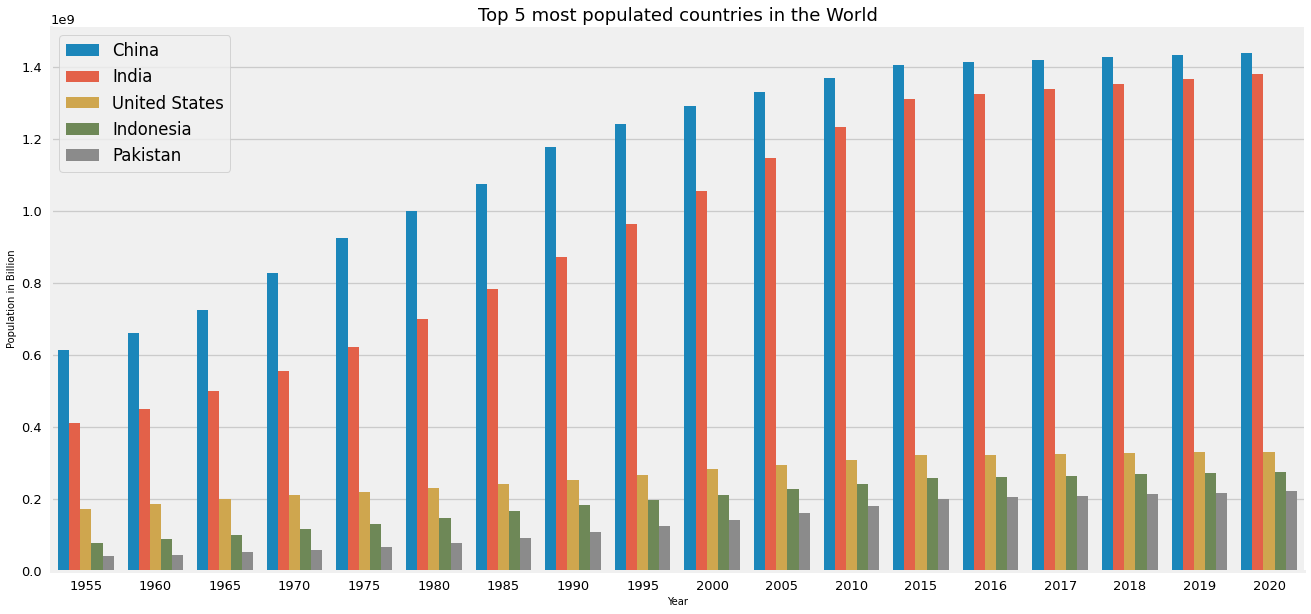

In [31]:
#Top 5 most populated countries in World.
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="Year", y="Population", data=top5_popultion, hue='Country')
ax.set_ylabel(ylabel = 'Population in Billion', fontsize = 10)
ax.set_xlabel(xlabel = 'Year', fontsize = 10)
ax.set_title('Top 5 most populated countries in the World')
ax.legend();

In [32]:
# Which country is Highly dense in 2020?
population_2020 = population[population['Year'] == 2020]
fig = px.choropleth(population_2020, locations="Country", 
                    locationmode='country names', color="Density (P/Km²)", 
                    hover_name="Country", range_color=[1,1000], 
                    color_continuous_scale="blues", 
                    title='Density of Countries in 2020')
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [33]:
# highly populated country
population_2020[population_2020['Population']==population_2020['Population'].max()][['Country','Population']]

,Country,Population
0,China,1439323776


In [34]:
#Which Country is Highly Populated?
fig = px.choropleth(population_2020, locations="Country", 
                    locationmode='country names', color="Population", 
                    hover_name="Country",
                    color_continuous_scale="dense", 
                    title='Population of Countries in 2020')
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [35]:
#Number of Countries with Population more than 1 Billion.
population_more_than_one_billion = population[(population['Population'] >= 1000000000) & (population['Year']==2020)]
number_of_countries = population_more_than_one_billion.shape[0]
print("There are {} countries in the world with more than 1 Billion population.".format(number_of_countries))

There are 2 countries in the world with more than 1 Billion population.
